# Data Combiner
The purpose of this workbook is to join the PD and Sham files inorder to produce graphs containing all the conditions for total distance moved, average velocity and average hunch over time during the experiment.

In addition this workbook will perform statistical analysis on all data

## Data Input
This section of the workbook inports the data files, and rearranges them so they can more easily be worked with

In [1]:
# This cell will import libraries
import numpy as np
import pandas as pd
import scipy.integrate
from scipy import stats
from matplotlib import pyplot as plt
from os import listdir
from IPython.display import display
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

font = {'fontname':'Liberation Serif'}

In [2]:
# This cell loads the files generated in the Movement Analysis workbook

# File paths to be used while importing and merging
data_path_pd='/home/sam/Science/microdialysis/MSDissertation/Behavior/DLC_CSVs/Output/PD/'
data_path_sham='/home/sam/Science/microdialysis/MSDissertation/Behavior/DLC_CSVs/Output/Sham/'


# Code for finding names of all CSVs in the specified folder 
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

file_names_pd = find_csv_filenames(data_path_pd, suffix=".csv" )
file_names_sham=find_csv_filenames(data_path_sham, suffix=".csv" )
print("This directory contains",str((len(file_names_pd)+len(file_names_sham))),"files which have been loaded")

hunch_pd=pd.read_csv(data_path_pd+"Hunch.csv")
hunch_sham=pd.read_csv(data_path_sham+"Hunch.csv")
COM_pd=pd.read_csv(data_path_pd+"COM.csv")
COM_sham=pd.read_csv(data_path_sham+"COM.csv")

print("Files loaded")

This directory contains 16 files which have been loaded
Files loaded


In [3]:
display(COM_pd)

,Unnamed: 0,Stimulated,Time (min),Unstimulated,Stimulated std,Unstimulated std
0,0,3.497796,1.000000,0.820447,0.101788,0.048554
1,1,3.167482,2.000000,0.630378,0.093269,0.035099
2,2,1.883602,3.000000,0.575560,0.058441,0.030575
3,3,3.150608,4.000000,0.778735,0.090888,0.039894
4,4,2.288725,5.000000,0.895742,0.066101,0.048366
5,5,2.179675,5.999999,0.829598,0.064640,0.041792
6,6,1.623975,6.999999,0.748709,0.050397,0.037076
7,7,1.912718,7.999999,1.074905,0.057224,0.059305
8,8,2.059049,8.999999,1.920140,0.059312,0.093119
9,9,1.949205,9.999999,2.098364,0.057268,0.100791


In [4]:
#This cell will stack the Hunch and COM files such that the unstimulated period procedes the stimulated period
    #this allows them to be used to more easily compare Sham animals and Parkinsonian animals

def stacker(df,name):
    store=pd.DataFrame()
    for index in range(len(df)):
        store.loc[index,name]=df.loc[index,"Unstimulated"]
        store.loc[index,(name+" std")]=df.loc[index,"Unstimulated std"]
        store.loc[index,"Time (min)"]=df.loc[index,"Time (min)"]
        store.loc[index,"Condition"]="Unstimulated"

    for index in range(len(df)):
#         The stack_index is the continuation of hte end of the index range in the proceding part of the df
        stack_index=len(df)+index
        store.loc[stack_index,name]=df.loc[index,"Stimulated"]
        store.loc[stack_index,(name+" std")]=df.loc[index,"Stimulated std"]
#         Time is incremented by adding each time value to the highest possible so it continues in sequence
        store.loc[stack_index,"Time (min)"]=df.loc[index,"Time (min)"]+df.loc[(len(df)-1),"Time (min)"]
        store.loc[stack_index,"Condition"]="Stimulated"
    return(store)


x=stacker(hunch_pd,"PD Hunch")
y=stacker(hunch_pd,"Sham Hunch")
y=stacker(hunch_sham,"Sham Hunch")
Hunch=x.merge(y)

x=stacker(COM_pd,"PD COM")
y=stacker(COM_pd,"Sham COM")
y=stacker(COM_sham,"Sham COM")
COM=x.merge(y)


## Graphing
The first plot to be generated will be to demonstrate total distance moved, a proxy for hypokinesia
The secod plot to be generated will demonstrated the average change in postion of the center of mass over time, a proxy for bradykinesia
The final graph will plot the average distance between the nose and tail base, a proxy for hunching which is itself a proxy for the head drop phenomeneon observed in human PD patients.

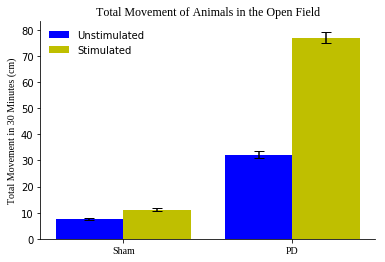

In [5]:
#The below rearranges the dfs and integrates them for plotting as a bar graph
U_pd=COM_pd["Unstimulated"]
U_high_pd=COM_pd["Unstimulated"]+COM_pd["Unstimulated std"]
U_low_pd=COM_pd["Unstimulated"]-COM_pd["Unstimulated std"]

# The integral of the averge change in movement is found in order to calculate the total movement during the recoridn period
U_pd=scipy.integrate.simps(U_pd,COM_pd['Time (min)'],U_pd)
U_error_pd=[scipy.integrate.simps(U_high_pd,COM_pd['Time (min)']), 
         scipy.integrate.simps(U_low_pd,COM_pd['Time (min)'])]

U_sham=COM_sham["Unstimulated"]
U_high_sham=COM_sham["Unstimulated"]+COM_sham["Unstimulated std"]
U_low_sham=COM_sham["Unstimulated"]-COM_sham["Unstimulated std"]

# The integral of the averge change in movement is found in order to calculate the total movement during the recoridn period
U_sham=scipy.integrate.simps(U_sham,COM_sham['Time (min)'],U_sham)
U_error_sham=[scipy.integrate.simps(U_high_sham,COM_sham['Time (min)']), 
         scipy.integrate.simps(U_low_sham,COM_sham['Time (min)'])]

# The integral of the averge change in movement is found in order to calculate the total movement during the recoridn period
S_pd=COM_pd["Stimulated"]
S_high_pd=COM_pd["Stimulated"]+COM_pd["Stimulated std"]
S_low_pd=COM_pd["Stimulated"]-COM_pd["Stimulated std"]

S_pd=scipy.integrate.simps(S_pd,COM_pd['Time (min)'])
S_error_pd=[scipy.integrate.simps(S_high_pd,COM_pd['Time (min)']), 
         scipy.integrate.simps(S_low_pd,COM_pd['Time (min)'])]

S_sham=COM_sham["Stimulated"]
S_high_sham=COM_sham["Stimulated"]+COM_sham["Stimulated std"]
S_low_sham=COM_sham["Stimulated"]-COM_sham["Stimulated std"]

S_sham=scipy.integrate.simps(S_sham,COM_sham['Time (min)'])
S_error_sham=[scipy.integrate.simps(S_high_sham,COM_sham['Time (min)']), 
         scipy.integrate.simps(S_low_sham,COM_sham['Time (min)'])]

data={'Animal':['Sham','PD'],
      'Unstimulated':[U_sham,U_pd],
      'Stimulated':[S_sham,S_pd],
      'Unstimulated Error':[(U_sham-U_error_sham[1]),(U_pd-U_error_pd[1])],
      'Stimulated Error':[(S_sham-S_error_sham[1]),(S_pd-S_error_pd[1])]}
data = pd.DataFrame(data,columns=['Animal','Unstimulated','Stimulated','Unstimulated Error','Stimulated Error'])



# Plotting bar graph of total movement observed
fig = plt.figure()
ax = fig.add_subplot(111)

pos=list(range(len(data['Stimulated'])))
width=0.4

ax.bar(pos, data['Unstimulated'],width,yerr=data["Unstimulated Error"],color='b',label='Unstimulated',ecolor='black', capsize=5)

ax.bar([p+width for p in pos], data['Stimulated'],width,yerr=data["Stimulated Error"],color='y',label='Stimulated',ecolor='black', capsize=5)

#X-axis parameters
ax.set_xticks([p-.2+width for p in pos])
ax.set_xticklabels(data["Animal"], **font)
plt.setp(plt.xticks()[1], rotation=0)

#Y-axis parameters
ax.set_ylabel('Total Movement in 30 Minutes (cm)', **font)

#Title and legend parameters
ax.set_title(("Total Movement of Animals in the Open Field"), **font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False)

display()

file_path1='/home/sam/Science/microdialysis/MSDissertation/Behavior/DLC_CSVs/Output/Tot_mov_bars.png'

plt.savefig(file_path1, dpi=300, transparent=True)

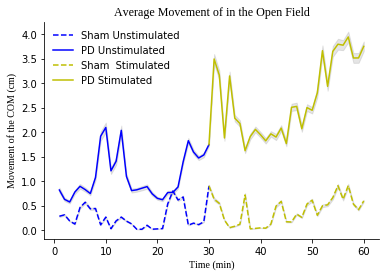

In [6]:
# This cell plots the COM per time

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time (min)", **font)

col=['b','y']


ax.plot(COM["Time (min)"][0:30],COM["Sham COM"][0:30], label="Sham Unstimulated", color=col[0], linestyle='--')
ax.plot(COM["Time (min)"][0:30],COM["PD COM"][0:30], label="PD Unstimulated", color =col[0])
    

ax.plot(COM["Time (min)"][29:61],COM["Sham COM"][29:61], label="Sham  Stimulated", color=col[1], linestyle='--')
ax.plot(COM["Time (min)"][29:61],COM["PD COM"][29:61], label="PD Stimulated", color =col[1])


ax.fill_between(COM["Time (min)"],COM["Sham COM"] - COM["Sham COM std"], COM["Sham COM"] + COM["Sham COM std"],
                 color='gray', alpha=0.2)

ax.fill_between(COM["Time (min)"],COM["PD COM"] - COM["PD COM std"], COM["PD COM"] + COM["PD COM std"],
                 color='gray', alpha=0.2)

#Y-axis parameters
ax.set_ylabel('Movement of the COM (cm)', **font)

#Title and legend parameters
ax.set_title(("Average Movement of in the Open Field"), **font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False)

display()

file_path1='/home/sam/Science/microdialysis/MSDissertation/Behavior/DLC_CSVs/Output/Av_Movement.png'

plt.savefig(file_path1, dpi=300, transparent=True)

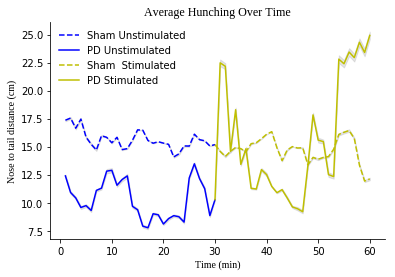

In [7]:
# This cell plots the Hunch / time

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time (min)", **font)

col=['b','y']


ax.plot(Hunch["Time (min)"][0:30],Hunch["Sham Hunch"][0:30], label="Sham Unstimulated", color=col[0], linestyle='--')
ax.plot(Hunch["Time (min)"][0:30],Hunch["PD Hunch"][0:30], label="PD Unstimulated", color =col[0])
    

ax.plot(Hunch["Time (min)"][29:61],Hunch["Sham Hunch"][29:61], label="Sham  Stimulated", color=col[1], linestyle='--')
ax.plot(Hunch["Time (min)"][29:61],Hunch["PD Hunch"][29:61], label="PD Stimulated", color =col[1])


ax.fill_between(Hunch["Time (min)"],Hunch["Sham Hunch"] - Hunch["Sham Hunch std"], Hunch["Sham Hunch"] + Hunch["Sham Hunch std"],
                 color='gray', alpha=0.2)

ax.fill_between(Hunch["Time (min)"],Hunch["PD Hunch"] - Hunch["PD Hunch std"], Hunch["PD Hunch"] + Hunch["PD Hunch std"],
                 color='gray', alpha=0.2)

#Y-axis parameters
ax.set_ylabel('Nose to tail distance (cm)', **font)

#Title and legend parameters
ax.set_title(("Average Hunching Over Time"), **font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False)

display()

file_path1='/home/sam/Science/microdialysis/MSDissertation/Behavior/DLC_CSVs/Output/Av_Hunch.png'

plt.savefig(file_path1, dpi=300, transparent=True)

## Statistics
As there are four conditions, each of the three symptoms will be compared by 2-way ANOVA, with follow-up testing if $\alpha < .05$

In [8]:
# This cell will first regroup the data to be easier to work with

def StatStack(df,name):   
    store=pd.DataFrame()
    for index in range(len(df)):
        store.loc[index,name]=df.iloc[index,0]
        store.loc[index,"Condition"]=df.iloc[index,3]
        store.loc[index,"Animal"]="PD"
        
    for index in range(len(df)):
        ii=len(df)+index
        store.loc[ii,name]=df.iloc[index,4]
        store.loc[ii,"Condition"]=df.iloc[index,3]
        store.loc[ii,"Animal"]="Sham"
    return(store)

com=StatStack(COM,"COM")
hunch=StatStack(Hunch,"Hunch")

print("Reorganization complete")

Reorganization complete


In [9]:
def ANOVA_marsja(df,indvar):
    # credit to https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

    # N is of all 120 measuremnts from the four conditions
    N=len(df)

    #Degrees of freedom for each dfbination
    degfree_animal=len(df["Animal"].unique())-1
    degfree_condition=len(df["Condition"].unique())-1
    degfree_anXcon=degfree_animal*degfree_condition
    degfree_within=len(df["Animal"].unique()) * len(df["Condition"].unique())

    # Sum of Squares
    grand_mean = df[indvar].mean()

    ssq_animal=sum([(df[df["Animal"] ==l][indvar].mean()-grand_mean)**2 for l in df["Animal"]])
    ssq_condition=sum([(df[df["Condition"] ==l][indvar].mean()-grand_mean)**2 for l in df["Condition"]])
    ssq_total=sum((df[indvar]-grand_mean)**2)

    # residual
    pd = df[df["Animal"] == "PD"]
    sham = df[df["Animal"] == "Sham"]
    pd_con_means=[pd[pd["Condition"]==c][indvar].mean() for c in pd["Condition"]]
    sham_con_means=[sham[sham["Condition"]==c][indvar].mean() for c in sham["Condition"]]

    ssq_within = sum((sham[indvar]-sham_con_means)**2)+sum((pd[indvar]-pd_con_means)**2)

    # Sum of squares of the interaction
    ssq_anXcon=ssq_total - ssq_animal - ssq_condition - ssq_within



    # Mean of squares
    ms_animal=ssq_animal/degfree_animal

    ms_condition = ssq_condition/degfree_condition

    ms_anXcon = ssq_anXcon/degfree_anXcon

    ms_within = ssq_within/degfree_within


    # F-ratio
    f_animal = ms_animal/ms_within
    f_condition = ms_condition/ms_within
    f_anXcon = ms_anXcon/ms_within

    # P-values

    p_animal = stats.f.sf(f_animal, degfree_animal, degfree_within)
    p_condition = stats.f.sf(f_condition, degfree_condition, degfree_within)
    p_anXcon = stats.f.sf(f_anXcon, degfree_anXcon, degfree_within)

    #Storing results
    results = {"Sum of Squares":[ssq_animal,ssq_condition,ssq_anXcon,ssq_within],
                  "df":[degfree_animal,degfree_condition,degfree_anXcon,degfree_within],
                  "f":[f_animal,f_condition,f_anXcon,'NaN'],
                  'p':[p_animal,p_condition,p_anXcon,'NaN']}
    columns=['Sum of Squares','df','f','p']

    ind=['Animal','Condition','Animal:Condition','Residual']

    import pandas as pd

    ANOVA_table= pd.DataFrame(results, columns=columns,index=ind)


    def eta_squared(aov):
        aov['eta_sq'] = 'NaN'
        aov['eta_sq'] = aov[:-1]['Sum of Squares']/sum(aov['Sum of Squares'])
        return aov

    def omega_squared(aov):
        mse = aov['Sum of Squares'][-1]/aov['df'][-1]
        aov['omega_sq'] = 'NaN'
        aov['omega_sq'] = (aov[:-1]['Sum of Squares']-(aov[:-1]['df']*mse))/(sum(aov['Sum of Squares'])+mse)
        return aov


    eta_squared(ANOVA_table)
    omega_squared(ANOVA_table)

    print("2-Way ANOVA for movement of the "+indvar+":")
    display(ANOVA_table)
    return(ANOVA_table)

COM_ANOVA_table=ANOVA_marsja(com,"COM")
Hunch_ANOVA_table=ANOVA_marsja(hunch,"Hunch")

2-Way ANOVA for movement of the COM:


,Sum of Squares,df,f,p,eta_sq,omega_sq
Animal,73.920646,1,10.9131,0.0298355,0.534447,0.462809
Condition,21.398049,1,3.15905,0.150144,0.154708,0.100799
Animal:Condition,15.899311,1,2.34725,0.200267,0.114952,0.062899
Residual,27.094319,4,NaN,NaN,NaN,NaN


2-Way ANOVA for movement of the Hunch:


,Sum of Squares,df,f,p,eta_sq,omega_sq
Animal,124.376771,1,0.517253,0.511793,0.079506,-0.064316
Condition,160.981137,1,0.669482,0.459173,0.102904,-0.044035
Animal:Condition,317.190735,1,1.31912,0.314762,0.202759,0.042516
Residual,961.825681,4,NaN,NaN,NaN,NaN


In [10]:
# This cell calculates the TTest for related values from the total distance moved data

MEAN=data["Unstimulated"][0]
STD=data["Unstimulated Error"][0]
Sham_unstim=stats.norm.rvs(loc=MEAN,scale=STD,size=3)

MEAN=data["Unstimulated"][1]
STD=data["Unstimulated Error"][1]
PD_unstim=stats.norm.rvs(loc=MEAN,scale=STD,size=2)

MEAN=data["Stimulated"][0]
STD=data["Stimulated Error"][0]
Sham_stim=stats.norm.rvs(loc=MEAN,scale=STD,size=3)

MEAN=data["Stimulated"][1]
STD=data["Stimulated Error"][1]
PD_stim=stats.norm.rvs(loc=MEAN,scale=STD,size=2)

display(data)

print("PD:")
display(stats.ttest_rel(PD_unstim,PD_stim))

print("Sham:")
display(stats.ttest_rel(Sham_unstim,Sham_stim))

,Animal,Unstimulated,Stimulated,Unstimulated Error,Stimulated Error
0,Sham,7.629947,11.143248,0.356645,0.561036
1,PD,32.217463,77.038105,1.430625,2.255852


PD:


Ttest_relResult(statistic=-40.441265754623885, pvalue=0.0157386287858816)

Sham:


Ttest_relResult(statistic=-11.111115491225679, pvalue=0.008002888806023931)

# R
The below finds the repeated measures ANOVA values using R

In [11]:
#This is the keyed in data frame to be used with R
DATA=pd.DataFrame({'Move':[PD_unstim[0],PD_unstim[1],PD_stim[0],PD_stim[1],Sham_unstim[0],Sham_unstim[1],Sham_unstim[2],Sham_stim[0],Sham_stim[1],Sham_stim[2]],
     'Animal':['PD','PD','PD','PD','Sham','Sham','Sham','Sham','Sham','Sham',],
     'Condition':['Unstim','Unstim','Stim','Stim','Unstim','Unstim','Unstim','Stim','Stim','Stim']})


In [12]:
#This is the keyed in data frame to be used with R, with catagories changed to numbers for easier entry
DATA=pd.DataFrame({'Move':[PD_unstim[0],PD_unstim[1],PD_stim[0],PD_stim[1],Sham_unstim[0],Sham_unstim[1],Sham_unstim[2],Sham_stim[0],Sham_stim[1],Sham_stim[2]],
     'Animal':[1,1,1,1,2,2,2,2,2,2,],
     'Condition':[1,1,2,2,1,1,1,2,2,2]})


In [13]:
%load_ext rpy2.ipython

In [14]:
%%R -i DATA

#This is the repeated measures anova of the total movement data
summary(aov(Move ~ Animal*Condition, data=DATA))

                 Df Sum Sq Mean Sq F value   Pr(>F)    
Animal            1   4949    4949  2671.1 3.52e-09 ***
Condition         1    888     888   479.4 5.93e-07 ***
Animal:Condition  1    912     912   492.2 5.48e-07 ***
Residuals         6     11       2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
